In [7]:
###  Mount Google Drive ###

# from google.colab import drive

# drive.mount('/content/gdrive')

In [1]:
###  Define root directory ###

ROOT_DIR = 'C:/Users/Admin/Downloads/DLE_SCE/data'

In [ ]:
# Install the ultralytics package using pip
# !pip install ultralytics

In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [4]:
#Instance
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 6.25M/6.25M [00:01<00:00, 4.49MB/s]


In [8]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /content/gdrive/MyDrive/DLE_SCE/data/config.yaml

path: "/content/gdrive/My Drive/DLE_SCE/data"
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ["AirPlane", "Drone", "Helicopter"]

roboflow:
  workspace: ahmedmohsen
  project: drone-detection-new-peksv
  version: 5
  license: MIT
  url: https://universe.roboflow.com/ahmedmohsen/drone-detection-new-peksv/dataset/5


In [10]:
# define number of classes based on YAML
import yaml
with open("/content/gdrive/MyDrive/DLE_SCE/data/config.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [11]:
#Define a project --> Destination directory for all results
project = "/content/gdrive/MyDrive/DLE_SCE/data/results"
#Define subdirectory for this specific training
name = "200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [12]:
# Train the model
results = model.train(data='/content/gdrive/MyDrive/DLE_SCE/data/config.yaml',
                      project=project,
                      name=name,
                      epochs=5,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/DLE_SCE/data/config.yaml, epochs=5, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/gdrive/MyDrive/DLE_SCE/data/results, name=200_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 125MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/My Drive/DLE_SCE/data/train/labels.cache... 10799 images, 2037 backgrounds, 0 corrupt: 100%|██████████| 10857/10857 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/gdrive/My Drive/DLE_SCE/data/valid/labels.cache... 603 images, 110 backgrounds, 0 corrupt: 100%|██████████| 603/603 [00:00<?, ?it/s]


Plotting labels to /content/gdrive/MyDrive/DLE_SCE/data/results/200_epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/gdrive/MyDrive/DLE_SCE/data/results/200_epochs-
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.958G      1.892      4.118      1.503          1        800: 100%|██████████| 2715/2715 [37:28<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:12<00:00,  6.01it/s]

                   all        603        497      0.479      0.492      0.522      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      0.99G      1.772      1.944      1.493          4        800: 100%|██████████| 2715/2715 [08:12<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:11<00:00,  6.70it/s]

                   all        603        497      0.536       0.61      0.574      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.929G      1.725      1.664      1.457          1        800: 100%|██████████| 2715/2715 [07:58<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:11<00:00,  6.51it/s]

                   all        603        497      0.646      0.701      0.729      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.929G      1.652      1.514      1.417          2        800: 100%|██████████| 2715/2715 [08:04<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:10<00:00,  7.47it/s]

                   all        603        497      0.719      0.769      0.801      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.988G      1.583      1.349      1.381          1        800: 100%|██████████| 2715/2715 [07:52<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:11<00:00,  6.52it/s]

                   all        603        497      0.764      0.824       0.86      0.464



5 epochs completed in 1.178 hours.
Optimizer stripped from /content/gdrive/MyDrive/DLE_SCE/data/results/200_epochs-/weights/last.pt, 6.3MB
Optimizer stripped from /content/gdrive/MyDrive/DLE_SCE/data/results/200_epochs-/weights/best.pt, 6.3MB

Validating /content/gdrive/MyDrive/DLE_SCE/data/results/200_epochs-/weights/best.pt...
Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:14<00:00,  5.16it/s]


                   all        603        497      0.766      0.824       0.86      0.464
              AirPlane        133        133      0.743      0.827      0.846      0.505
                 Drone        220        224      0.761      0.839      0.855      0.382
            Helicopter        140        140      0.793      0.807      0.879      0.506
Speed: 0.7ms preprocess, 6.6ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/gdrive/MyDrive/DLE_SCE/data/results/200_epochs-


In [6]:
from IPython.display import Image

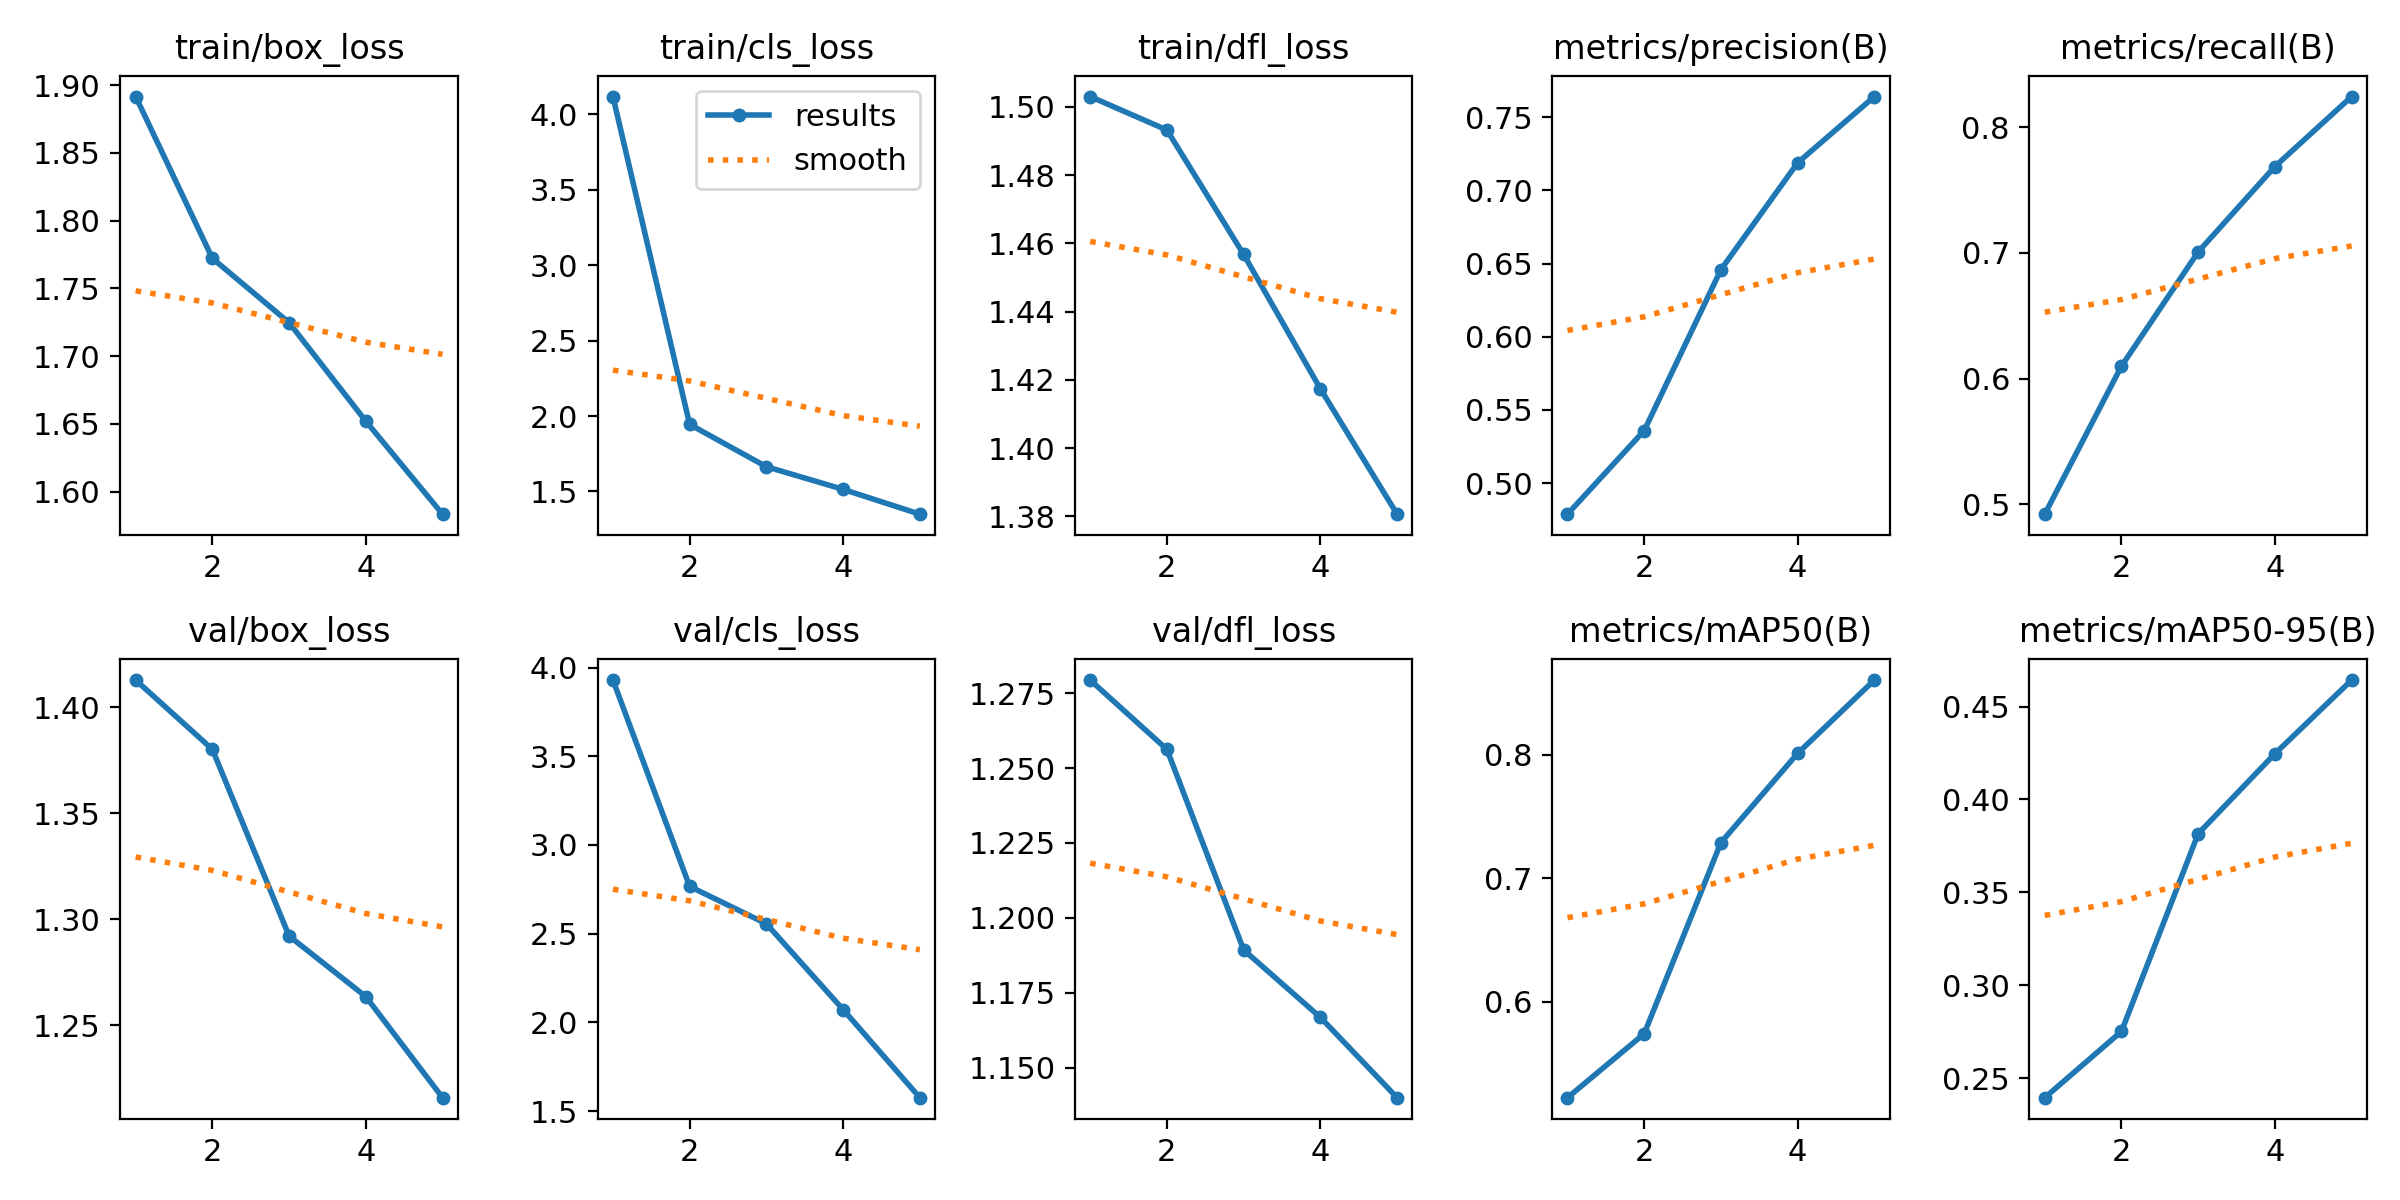

In [13]:
Image(ROOT_DIR+"/results/200_epochs-/results.png")

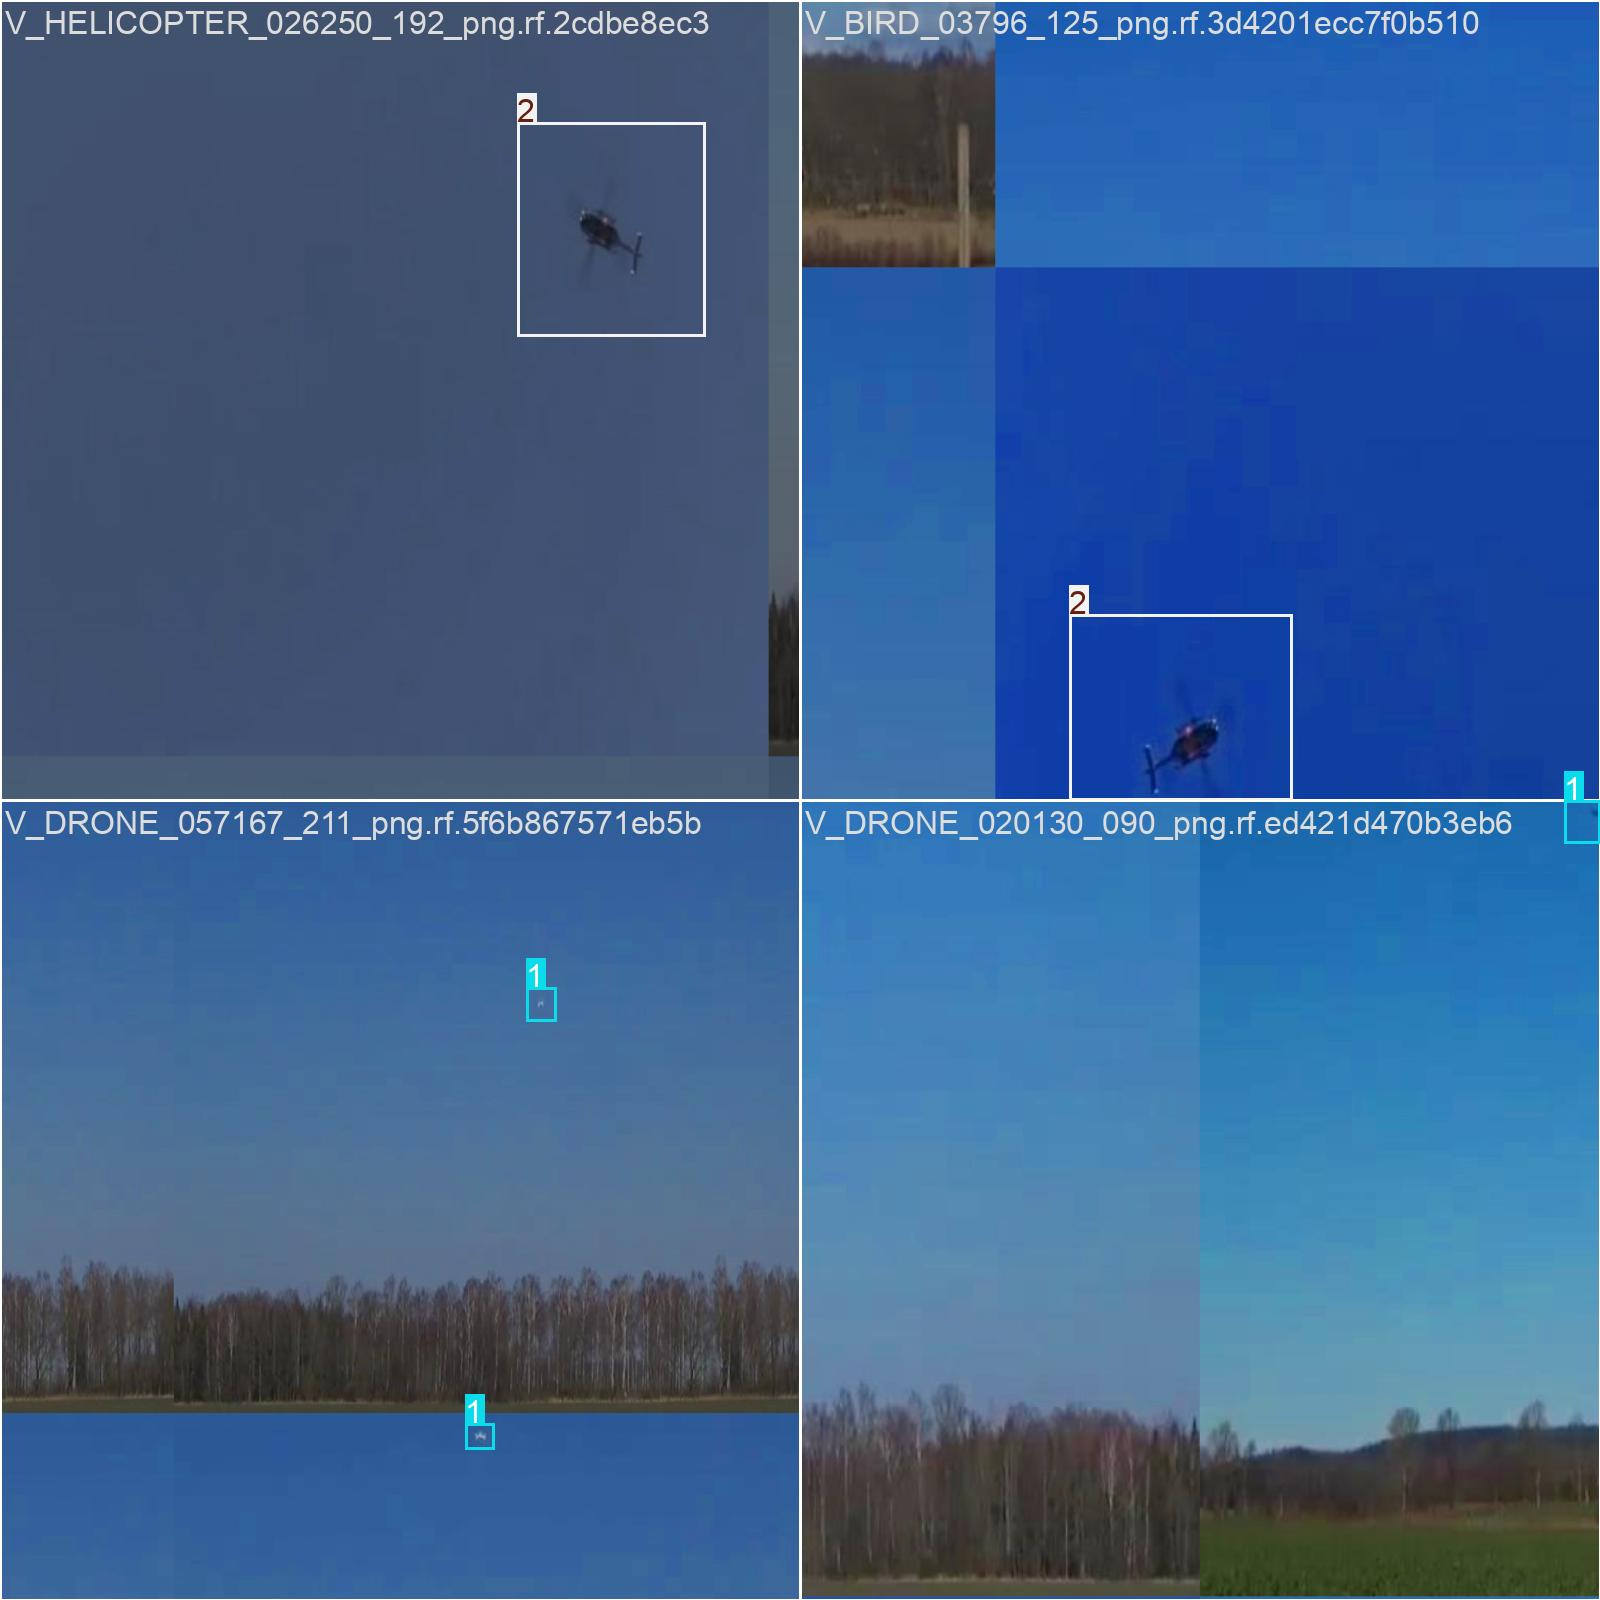

In [21]:
Image(filename='/content/gdrive/MyDrive/DLE_SCE/data/results/200_epochs-/train_batch2.jpg', width=900)

In [8]:
#Withut this Colab is giving an error when installing Roboflow
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [23]:
#List the saved models in 'runs' directory. Note that you will see multiple 'train' subdirectories numbered 1, 2, 3, etc. The exact number depends on the number of epochs.
%ls /content/gdrive/MyDrive/DLE_SCE/data/results/200_epochs-/weights

best.pt  last.pt


In [4]:
my_new_model = YOLO(ROOT_DIR+'/results/200_epochs-/weights/last.pt')

In [ ]:
new_image = '/content/gdrive/MyDrive/DLE_SCE/data/test/images/V_AIRPLANE_0011_025_png.rf.1224f43106fb9462c60db7add1b26996.jpg'
new_results = my_new_model.predict(new_image, conf=0.3)  #Adjust conf threshold



image 1/1 /content/gdrive/MyDrive/DLE_SCE/data/test/images/V_AIRPLANE_0011_025_png.rf.1224f43106fb9462c60db7add1b26996.jpg: 800x800 1 AirPlane, 10.2ms
Speed: 5.3ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)


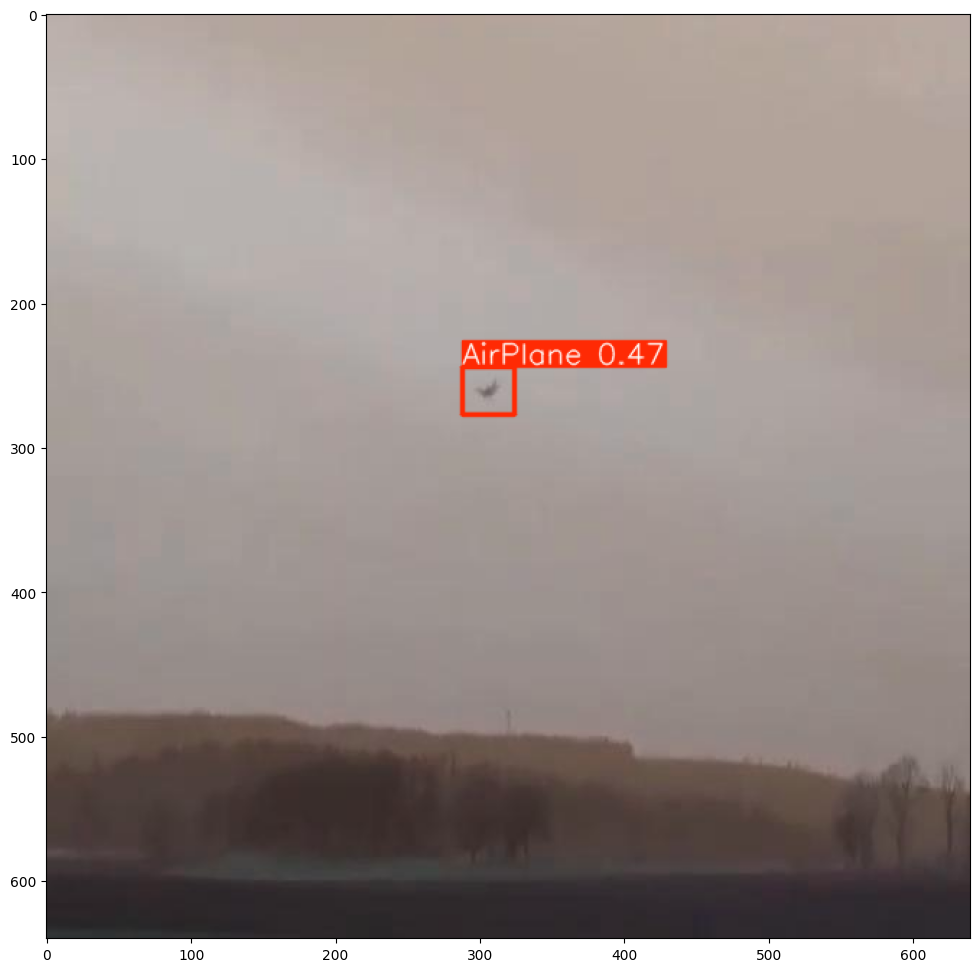

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_image = '/content/gdrive/MyDrive/DLE_SCE/data/test/images/V_DRONE_056166_141_png.rf.84510015595ce58d11c857d673b5cc3e.jpg'
new_results = my_new_model.predict(new_image, conf=0.3)  #Adjust conf threshold



image 1/1 /content/gdrive/MyDrive/DLE_SCE/data/test/images/V_DRONE_056166_141_png.rf.84510015595ce58d11c857d673b5cc3e.jpg: 800x800 1 Drone, 10.3ms
Speed: 6.0ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)


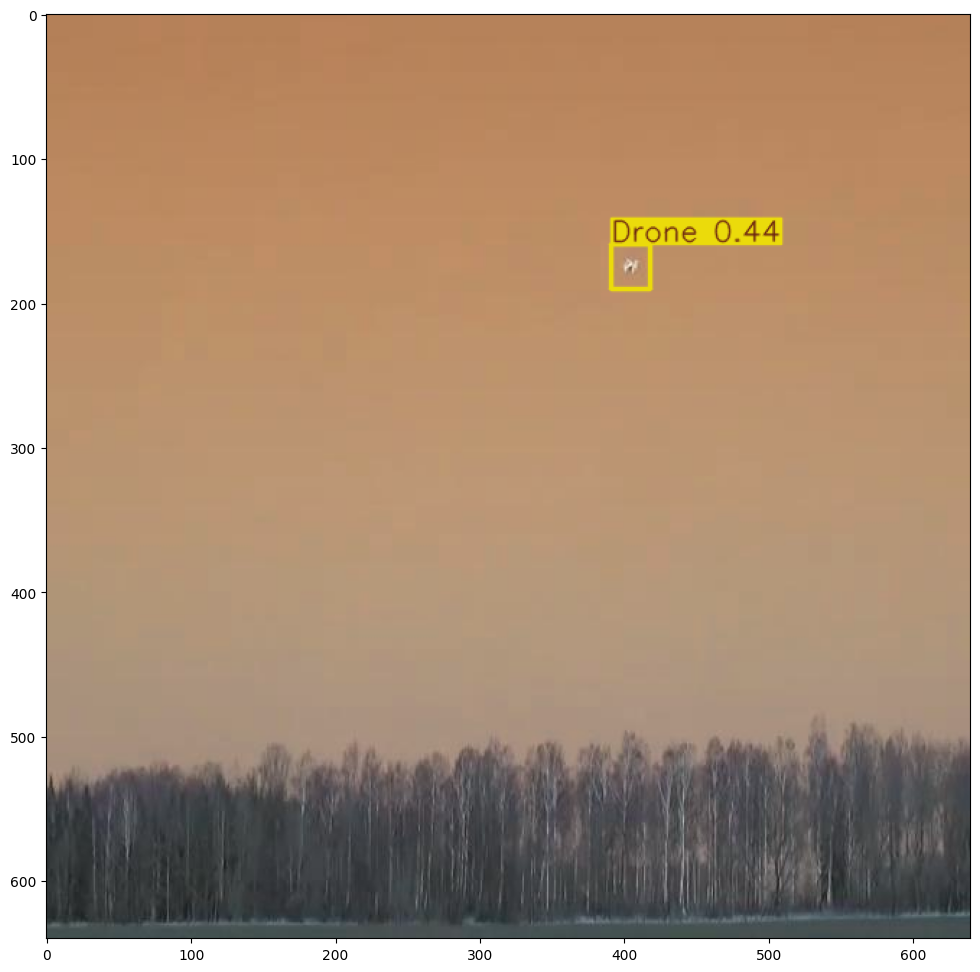

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_image = '/content/gdrive/MyDrive/DLE_SCE/data/test/images/V_HELICOPTER_047271_070_png.rf.9bd56e5d283a8fbb799a608f56c0a023.jpg'
new_results = my_new_model.predict(new_image, conf=0.3)  #Adjust conf threshold



image 1/1 /content/gdrive/MyDrive/DLE_SCE/data/test/images/V_HELICOPTER_047271_070_png.rf.9bd56e5d283a8fbb799a608f56c0a023.jpg: 800x800 1 Helicopter, 10.3ms
Speed: 6.0ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 800)


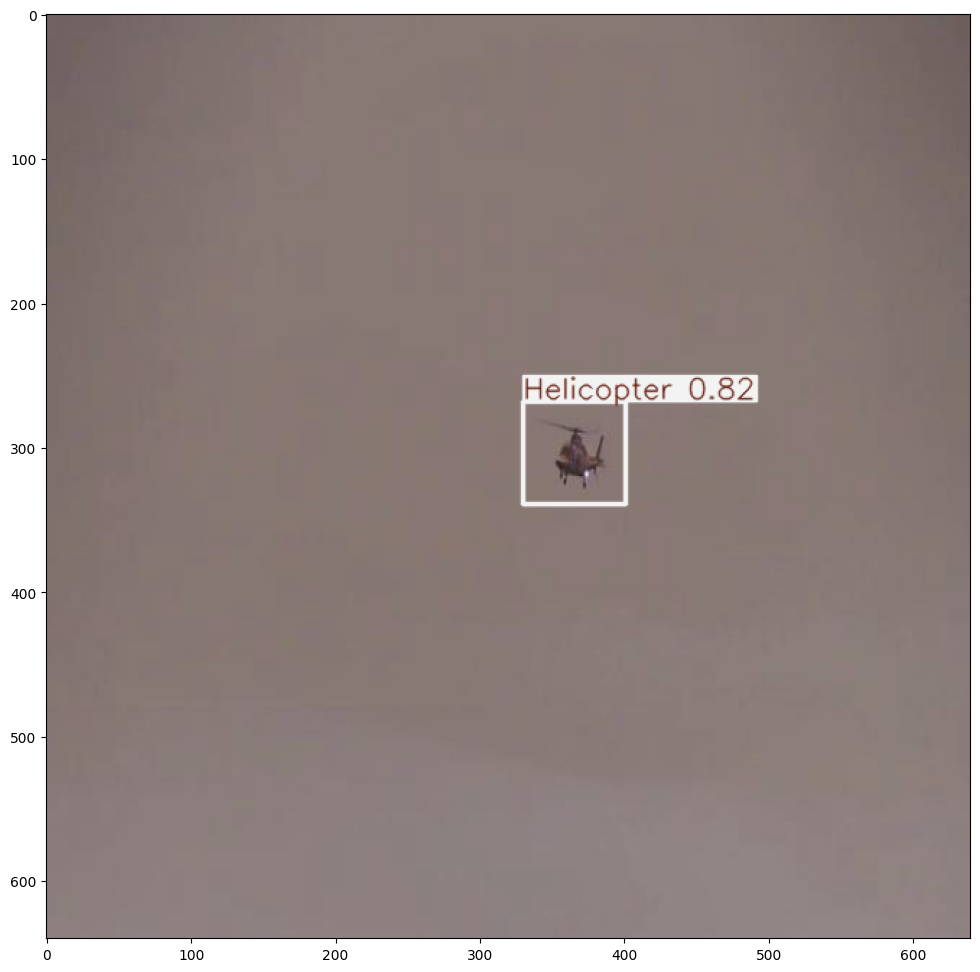

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_image = '/content/gdrive/MyDrive/DLE_SCE/data/test/images/V_BIRD_048107_277_png.rf.9ac8df8205e69969992901ccc55cb136.jpg'
new_results = my_new_model.predict(new_image, conf=0.3)  #Adjust conf threshold



image 1/1 /content/gdrive/MyDrive/DLE_SCE/data/test/images/V_BIRD_048107_277_png.rf.9ac8df8205e69969992901ccc55cb136.jpg: 800x800 (no detections), 10.6ms
Speed: 5.4ms preprocess, 10.6ms inference, 0.9ms postprocess per image at shape (1, 3, 800, 800)


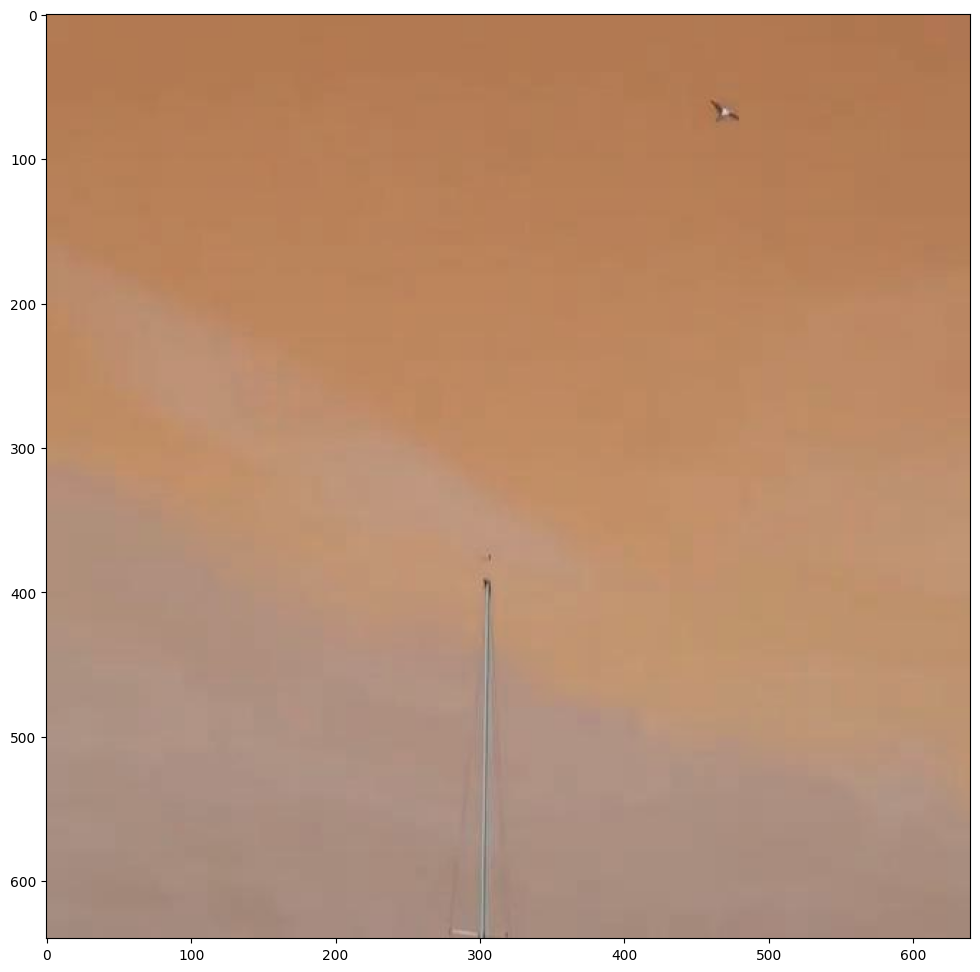

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_results = my_new_model.predict(source="http://192.168.1.9:8080/video", conf=0.3)  #Adjust conf threshold


1/1: http://192.168.1.9:8080/video... Success  (inf frames of shape 1920x1080 at 25.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x800 (no detections), 315.8ms
0: 480x800 (no detections), 248.4ms
0: 480x800 (no detections), 305.6ms
0: 480x800 (no detections), 300.1ms
0: 480x800 (no detections), 324.3ms
0: 480x800 1 AirPlane, 1 Helicopter, 216.5ms
0: 480x800 1 AirPlane, 304.8ms
0: 480x800 1 AirPlane, 305.5ms
0: 480x800 1 AirPlane, 266.5ms
0: 480x800 1 AirPlane, 224.8ms
0: 480x800 (no d

In [5]:
import cv2
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to access the webcam.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Failed to capture frame.")
        break
    
    # Run inference on the frame
    results = my_new_model.predict(frame)

    # Render the detection results on the frame
    annotated_frame = results[0].plot()  # Get the annotated frame from the first result

    # Display the annotated frame
    cv2.imshow("YOLO Detection", annotated_frame)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


0: 608x800 (no detections), 422.5ms
Speed: 33.2ms preprocess, 422.5ms inference, 6.1ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 304.0ms
Speed: 13.5ms preprocess, 304.0ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 278.7ms
Speed: 36.7ms preprocess, 278.7ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 266.2ms
Speed: 29.9ms preprocess, 266.2ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 1 Helicopter, 221.2ms
Speed: 11.7ms preprocess, 221.2ms inference, 16.7ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 336.9ms
Speed: 11.6ms preprocess, 336.9ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 279.1ms
Speed: 13.8ms preprocess, 279.1ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 800)

0: 608x800 (no detections), 249.4ms
Speed: 6.3ms 

KeyboardInterrupt: 